# Размер случайного леса

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [16]:
df=pd.read_csv(r'C:\Anaconda\data\abalone.csv')

In [17]:
# Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1.

df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [18]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,-1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,-1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [34]:
# Разделите содержимое файлов на признаки и целевую переменную. 
# В последнем столбце записана целевая переменная, в остальных — признаки.

X=df.loc[:,'Sex':'ShellWeight']
y=df['Rings']

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [40]:
from sklearn.cross_validation import KFold, cross_val_score

In [46]:
kf=KFold (y.size, n_folds=5, shuffle=True, random_state=1)
    

In [54]:
scores=[0]
n_estimators=range(1,51)
for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=1)
    score = np.mean(cross_val_score(model, X, y, cv=kf, scoring='r2'))
    scores.append(score)

In [61]:
# Определите, при каком минимальном количестве деревьев 
# случайный лес показывает качество на кросс-валидации выше 0.52. 

for score in scores:
    if score > 0.52:
        print(n)
        break

22


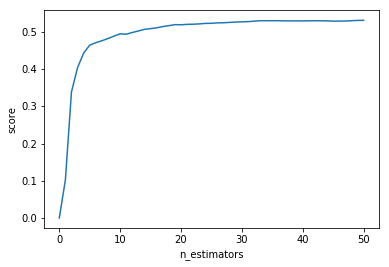

In [68]:
# Визуализируем изменение качества оценки на кросс-валидации в зависимости от числа деревьев

import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.savefig('estimators_score.png')